The *nursery* dataset was derived from a hierarchical decision model that ranks nursery-school applications for nursery schools. It has 12960 rows, and 9 columns.

1. Target

The target feature is *class*, it is of ordinal type and takes the following values (in ascending order): **not_recom**, **recommend**, **very_recom**, **priority**, **spec_prior**.

2. Feature

There are 8 feature attributes, they are *parents*, *has_nurs*, *form*, *children*, *housing*, *finance*, *social*, and *health*. All of the features are of ordinal type.

3. Preprocessing

There  are no missing values, nor outliers in the dataset. However, there are only 2 instances (out of 12960) of the value **recommend** for the target attribute.

In order to satisfy the pre conditions of some of the models that we expect to use, and since all of the features are of categorical type, it will be necessary to transform them into dummy/binary variables. However, this may lead to a dataset with too sparse data.

In [43]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 

In [22]:
import pandas

nursery = pd.read_csv(
    r"C:\Users\IvanB\OneDrive - NOVAIMS\University\TU\Semester 1\Machine Learning\Ex0\nursery\nursery.data",
    names=["parents","has_nurs","form","children","housing","finance","social","health","class"]
)

In [24]:
nursery.head()  # Displays the first 5 rows

,parents,has_nurs,form,children,housing,finance,social,health,class
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority


In [25]:
nursery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12960 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   parents   12960 non-null  object
 1   has_nurs  12960 non-null  object
 2   form      12960 non-null  object
 3   children  12960 non-null  object
 4   housing   12960 non-null  object
 5   finance   12960 non-null  object
 6   social    12960 non-null  object
 7   health    12960 non-null  object
 8   class     12960 non-null  object
dtypes: object(9)
memory usage: 911.4+ KB


In [26]:
nursery.describe()

,parents,has_nurs,form,children,housing,finance,social,health,class
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [27]:
nursery.shape  # (number_of_rows, number_of_columns)

(12960, 9)

In [32]:
for column in nursery.columns:
    unique_values = nursery[column].unique()
    print(f"Categories in {column}:\t{unique_values}")

Categories in parents:	['usual' 'pretentious' 'great_pret']
Categories in has_nurs:	['proper' 'less_proper' 'improper' 'critical' 'very_crit']
Categories in form:	['complete' 'completed' 'incomplete' 'foster']
Categories in children:	['1' '2' '3' 'more']
Categories in housing:	['convenient' 'less_conv' 'critical']
Categories in finance:	['convenient' 'inconv']
Categories in social:	['nonprob' 'slightly_prob' 'problematic']
Categories in health:	['recommended' 'priority' 'not_recom']
Categories in class:	['recommend' 'priority' 'not_recom' 'very_recom' 'spec_prior']


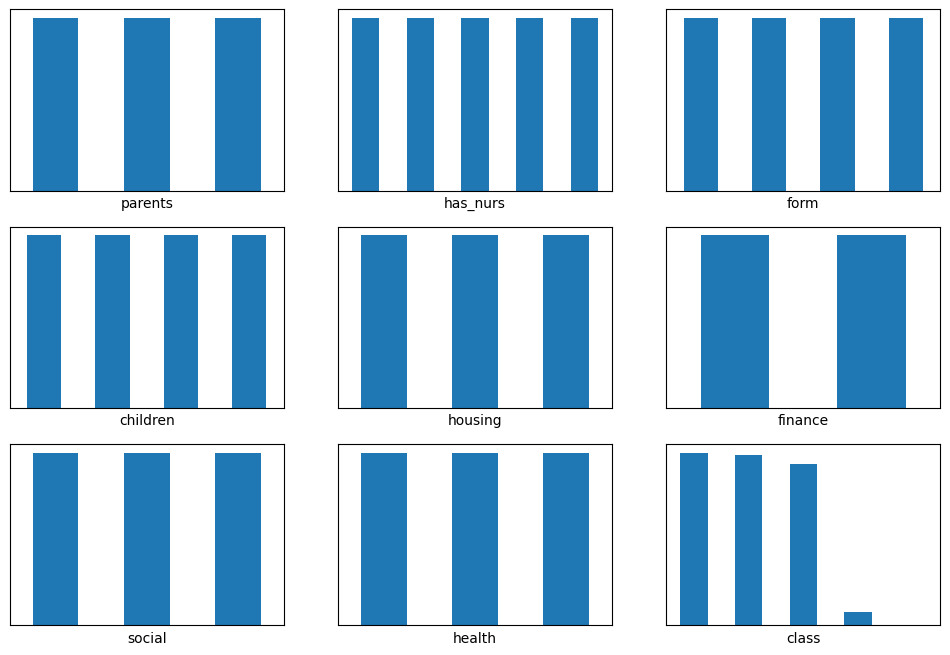

In [38]:
import matplotlib.pyplot as plt

# Create a 3x3 grid of subplots to display each column
fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Iterate through the columns and plot them
for i, column in enumerate(nursery.columns):
    row, col = divmod(i, 3)  # Calculate the row and column indices
    nursery[column].value_counts().plot(kind='bar', ax=axes[row, col])
    # Hide the x and y axis labels
    axes[row, col].set_xticks([])
    axes[row, col].set_yticks([])

# Display the subplots
plt.show()

In [42]:
nursery['class'].value_counts()

class
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64